✅ Dataset loaded successfully.

--- Dataset Preview ---
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  

C:\Users\mdars\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\mdars\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\mdars\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

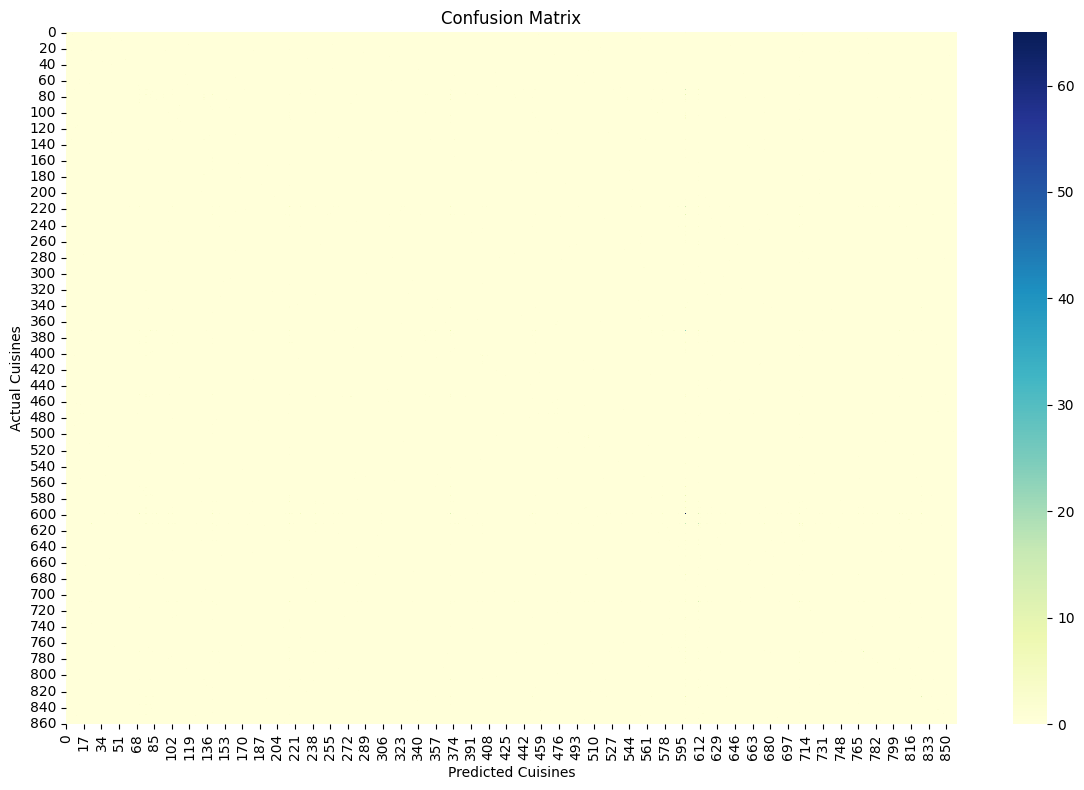


🌟 Top 10 Important Features:
Votes                      0.399964
Aggregate rating           0.225788
Average Cost for two       0.204367
Price range                0.030145
Has Online delivery_Yes    0.020468
Has Table booking_Yes      0.010009
City_New Delhi             0.009402
City_Gurgaon               0.008255
City_Noida                 0.006829
Country Code               0.006299
dtype: float64


C:\Users\mdars\AppData\Local\Temp\ipykernel_19692\1750321155.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


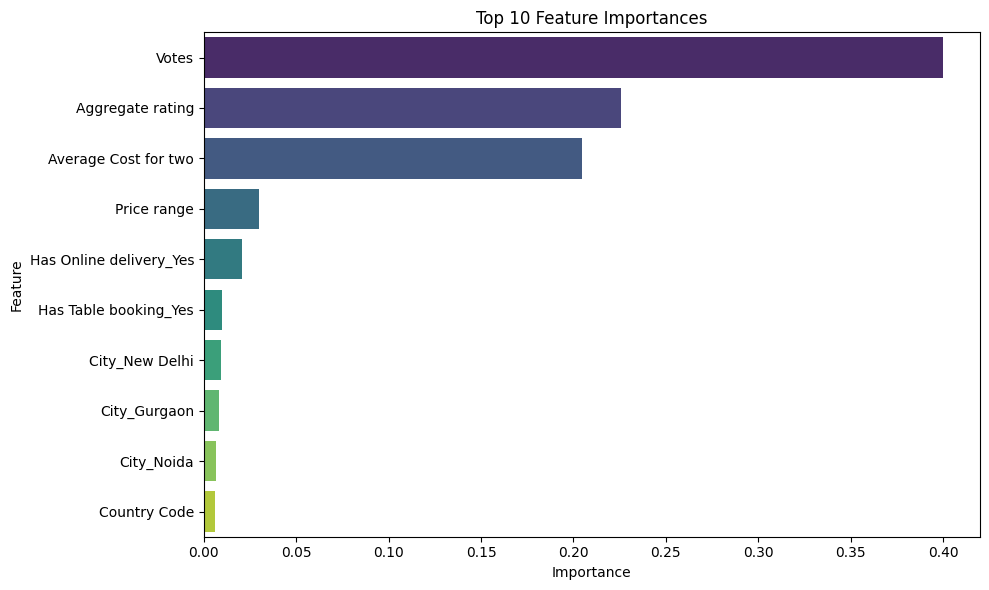

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load Dataset ---
filename = "Dataset .csv"
if not os.path.exists(filename):
    print(f"❌ File '{filename}' not found. Check the name or move it to the same folder.")
    print("📁 Available files:", os.listdir())
    exit()

df = pd.read_csv(filename)
print("✅ Dataset loaded successfully.\n")

# --- Step 2: Data Overview ---
print("--- Dataset Preview ---")
print(df.head())
print("\n--- Data Info ---")
print(df.info())

# --- Step 3: Clean Data ---
# Drop rows with missing target
if 'Cuisines' not in df.columns:
    print("❌ Target column 'Cuisines' not found.")
    exit()

df.dropna(subset=["Cuisines"], inplace=True)

# Drop unnecessary columns if they exist
columns_to_drop = [
    "Restaurant ID", "Restaurant Name", "Address", "Locality", "Locality Verbose",
    "Longitude", "Latitude", "Currency", "Switch to order menu", "Rating color", "Rating text"
]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# One-hot encode categorical columns
categorical_cols = ["City", "Has Table booking", "Has Online delivery", "Is delivering now"]
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col in df.columns], drop_first=True)

# Label encode the target column
label_encoder = LabelEncoder()
df["Cuisines"] = label_encoder.fit_transform(df["Cuisines"])

# --- Step 4: Split Features and Target ---
X = df.drop("Cuisines", axis=1)
y = df["Cuisines"]

# --- Step 5: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 6: Model Training ---
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("\n✅ Model training complete.")

# --- Step 7: Prediction & Evaluation ---
y_pred = model.predict(X_test)

print("\n📊 Classification Report:")
test_labels = np.unique(y_test)
target_names_subset = label_encoder.inverse_transform(test_labels)
print(classification_report(y_test, y_pred, labels=test_labels, target_names=target_names_subset))

# --- Step 8: Confusion Matrix ---
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="YlGnBu", annot=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Cuisines")
plt.ylabel("Actual Cuisines")
plt.tight_layout()
plt.show()

# --- Step 9: Feature Importance ---
if hasattr(model, 'feature_importances_'):
    importances = pd.Series(model.feature_importances_, index=X.columns)
    top_features = importances.sort_values(ascending=False).head(10)

    print("\n🌟 Top 10 Important Features:")
    print(top_features)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
    plt.title("Top 10 Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()